In [ ]:
# WGAN compared with GAN: (1) remove sigmoid of D, (2) remove log of losses, (3) clip D's parameter to [-c, c]

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

from sklearn.preprocessing import LabelBinarizer

import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

train_dataset = datasets.MNIST(root='./num/',
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)
test_dataset = datasets.MNIST(root='./num/',
                              train=False,
                              transform=transforms.ToTensor(),
                              download=True)
batch_size = 64
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=True)

[Epoch 0/100] [D loss: -32.621819] [G loss: 32.179016]
0.01412906963378191
-0.00559415016323328


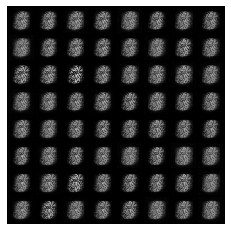

[Epoch 1/100] [D loss: -32.513176] [G loss: 31.689415]
0.026294879615306854
0.009705815464258194


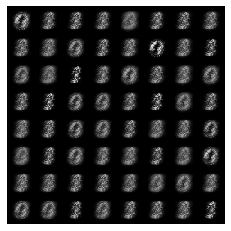

[Epoch 2/100] [D loss: -32.973812] [G loss: 32.521172]
0.01617104932665825
-0.0162866972386837


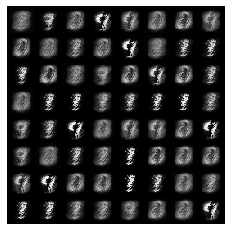

[Epoch 3/100] [D loss: -32.585037] [G loss: 31.920982]
0.021638480946421623
0.0024692895822227


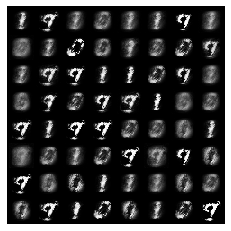

[Epoch 4/100] [D loss: -32.893211] [G loss: 32.124863]
0.02545877732336521
-0.003901854157447815


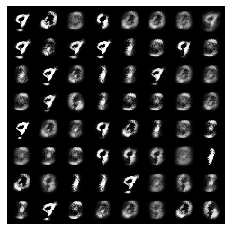

[Epoch 5/100] [D loss: -32.737343] [G loss: 31.785717]
0.030357304960489273
0.0066963182762265205


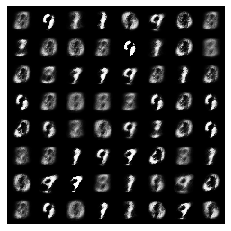

[Epoch 6/100] [D loss: -32.423096] [G loss: 32.359966]
0.0023213960230350494
-0.011248931288719177


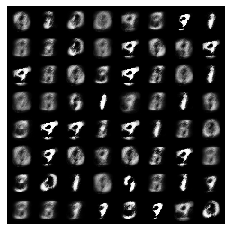

[Epoch 7/100] [D loss: -32.317505] [G loss: 31.767233]
0.01756840944290161
0.007273984141647816


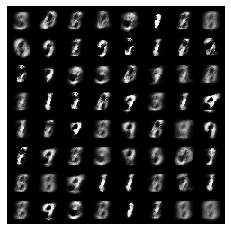

[Epoch 8/100] [D loss: -32.228973] [G loss: 31.717957]
0.016355078667402267
0.008813838474452496


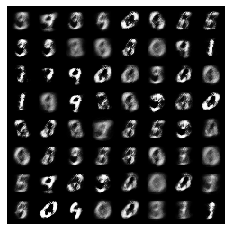

[Epoch 9/100] [D loss: -32.549240] [G loss: 32.091995]
0.01518957782536745
-0.002874951111152768


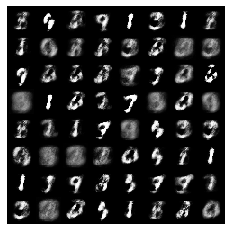

[Epoch 10/100] [D loss: -32.228615] [G loss: 31.796701]
0.013610734604299068
0.006353052332997322


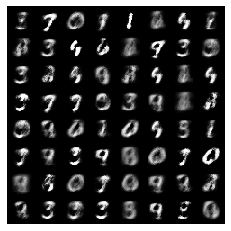

[Epoch 11/100] [D loss: -32.253906] [G loss: 32.027161]
0.007850371301174164
-0.0008488312014378607


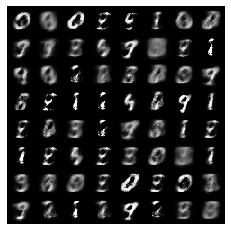

[Epoch 12/100] [D loss: -32.107609] [G loss: 31.677055]
0.013547170907258987
0.010092033073306084


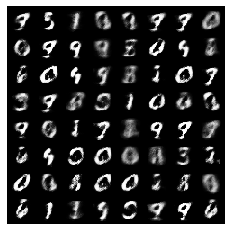

[Epoch 13/100] [D loss: -32.250481] [G loss: 31.726269]
0.016741003841161728
0.00855407863855362


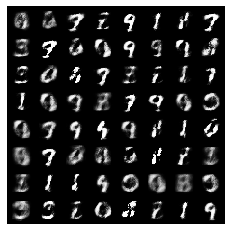

[Epoch 14/100] [D loss: -32.071690] [G loss: 31.757135]
0.01003715768456459
0.007589485961943865


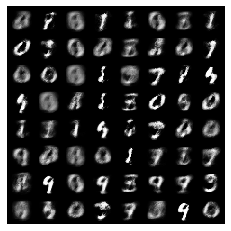

[Epoch 15/100] [D loss: -32.085560] [G loss: 31.714115]
0.011879603378474712
0.00893386360257864


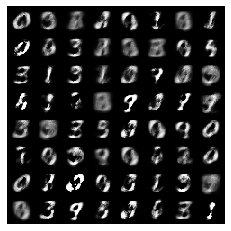

[Epoch 16/100] [D loss: -32.107460] [G loss: 31.637363]
0.014836632646620274
0.011332431808114052


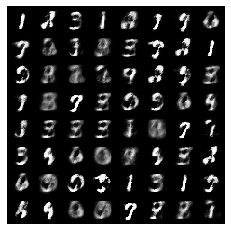

[Epoch 17/100] [D loss: -32.052025] [G loss: 31.699814]
0.011073041707277298
0.009380791336297989


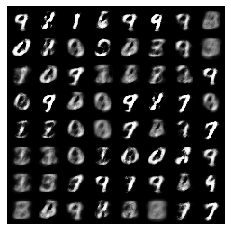

[Epoch 18/100] [D loss: -32.091652] [G loss: 31.864693]
0.00727052940055728
0.004228292498737574


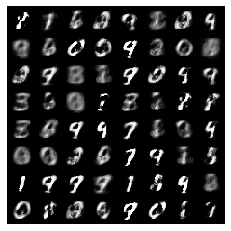

[Epoch 19/100] [D loss: -31.960049] [G loss: 31.906261]
0.0021767462603747845
0.0029293361585587263


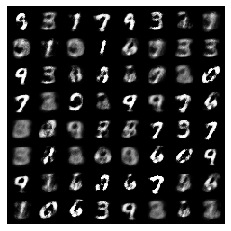

[Epoch 20/100] [D loss: -32.137596] [G loss: 31.971077]
0.005336941219866276
0.0009038095595315099


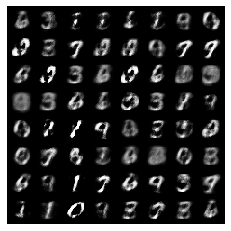

[Epoch 21/100] [D loss: -32.111069] [G loss: 31.478886]
0.01992082968354225
0.01628485694527626


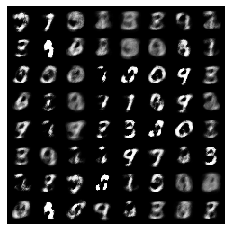

[Epoch 22/100] [D loss: -32.100128] [G loss: 31.655457]
0.014020595699548721
0.010767034254968166


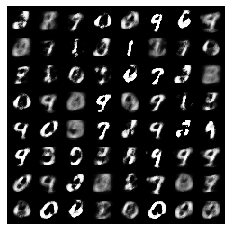

[Epoch 23/100] [D loss: -32.104385] [G loss: 31.812483]
0.009285841137170792
0.005859893746674061


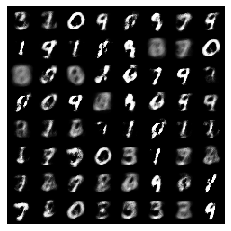

[Epoch 24/100] [D loss: -32.028564] [G loss: 31.652054]
0.01179670449346304
0.010873286984860897


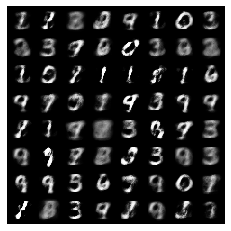

[Epoch 25/100] [D loss: -32.286926] [G loss: 31.845249]
0.014691769145429134
0.004835968371480703


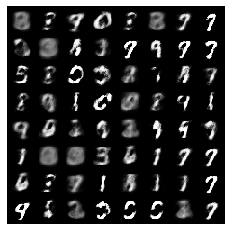

[Epoch 26/100] [D loss: -31.998301] [G loss: 31.680161]
0.010120737366378307
0.009994979947805405


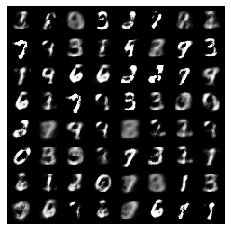

[Epoch 27/100] [D loss: -32.148132] [G loss: 31.821144]
0.010674623772501945
0.0055892858654260635


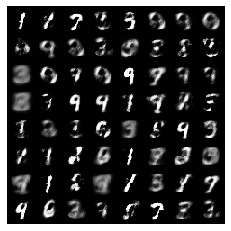

[Epoch 28/100] [D loss: -32.072388] [G loss: 31.729124]
0.01078864373266697
0.008464884012937546


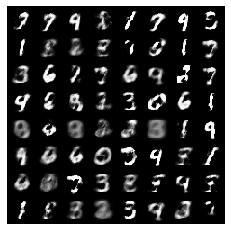

[Epoch 29/100] [D loss: -32.029305] [G loss: 31.885181]
0.004967663902789354
0.0035881218500435352


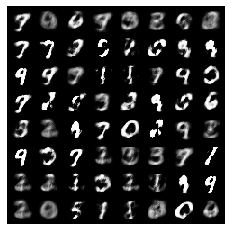

[Epoch 30/100] [D loss: -32.092918] [G loss: 31.636541]
0.015443388372659683
0.011358106508851051


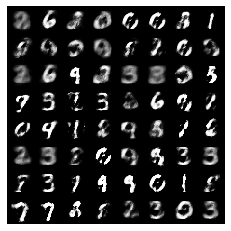

[Epoch 31/100] [D loss: -32.130226] [G loss: 31.811108]
0.010218311101198196
0.005902842618525028


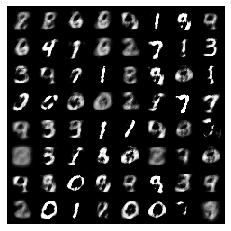

[Epoch 32/100] [D loss: -32.335197] [G loss: 31.637650]
0.022540433332324028
0.011323438957333565


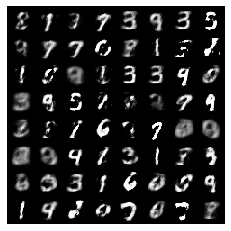

[Epoch 33/100] [D loss: -32.149559] [G loss: 31.394268]
0.023863425478339195
0.018929123878479004


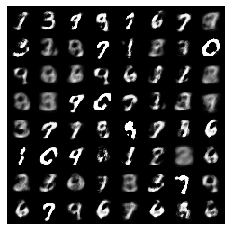

[Epoch 34/100] [D loss: -32.276142] [G loss: 31.815256]
0.014965429902076721
0.005773230455815792


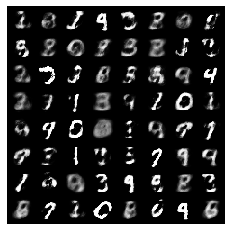

[Epoch 35/100] [D loss: -32.027824] [G loss: 31.683474]
0.011075137183070183
0.009891439229249954


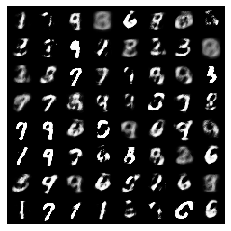

[Epoch 36/100] [D loss: -32.203102] [G loss: 31.850636]
0.01164516992866993
0.00466759642586112


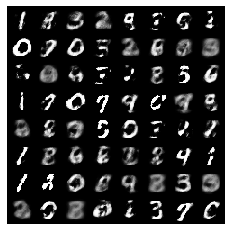

[Epoch 37/100] [D loss: -32.016796] [G loss: 31.736261]
0.009259805083274841
0.008241835050284863


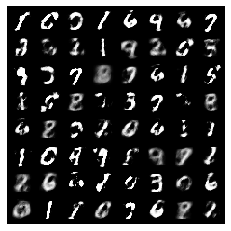

[Epoch 38/100] [D loss: -32.278999] [G loss: 31.805500]
0.015580927953124046
0.006078104488551617


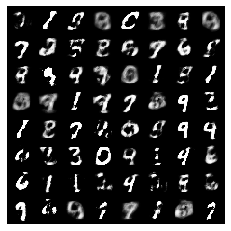

[Epoch 39/100] [D loss: -32.205193] [G loss: 31.995268]
0.0075021591037511826
0.00014788948465138674


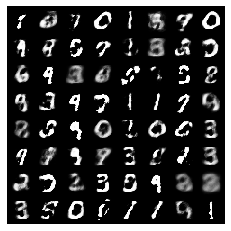

[Epoch 40/100] [D loss: -32.073406] [G loss: 31.782238]
0.009857574477791786
0.006805009208619595


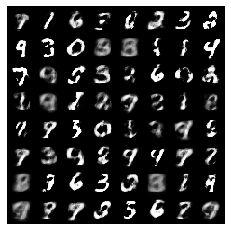

[Epoch 41/100] [D loss: -32.246948] [G loss: 31.904537]
0.011730792932212353
0.0029832893051207066


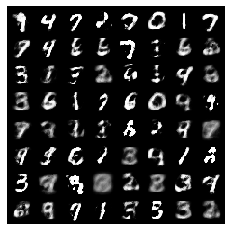

[Epoch 42/100] [D loss: -32.099808] [G loss: 31.926735]
0.006942793261259794
0.002289513824507594


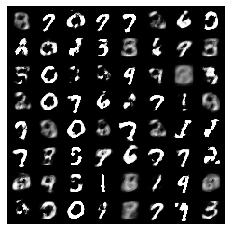

[Epoch 43/100] [D loss: -32.146011] [G loss: 31.832403]
0.010062938556075096
0.005237400531768799


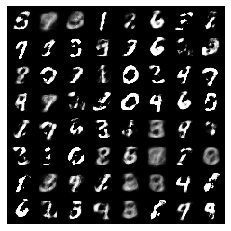

[Epoch 44/100] [D loss: -32.065285] [G loss: 31.812716]
0.008232507854700089
0.0058526345528662205


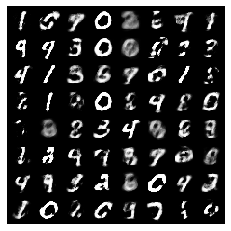

[Epoch 45/100] [D loss: -32.249203] [G loss: 32.020973]
0.007688598707318306
-0.0006553989951498806


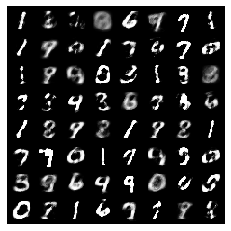

[Epoch 46/100] [D loss: -32.146362] [G loss: 31.754482]
0.012681618332862854
0.007672485895454884


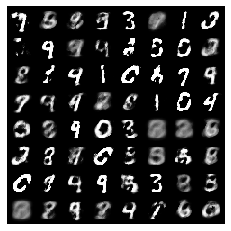

[Epoch 47/100] [D loss: -32.138000] [G loss: 32.168514]
-0.00010251626372337341
-0.005266123451292515


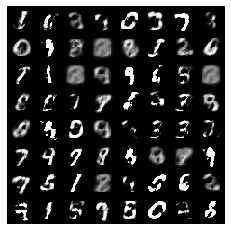

[Epoch 48/100] [D loss: -31.804031] [G loss: 31.540436]
0.008622757159173489
0.014361375942826271


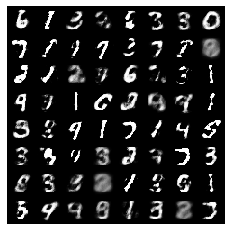

[Epoch 49/100] [D loss: -32.149536] [G loss: 32.053200]
0.003389913123100996
-0.0016625556163489819


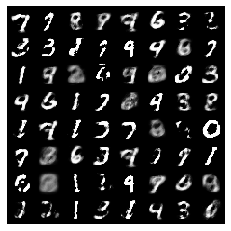

[Epoch 50/100] [D loss: -32.108360] [G loss: 31.737568]
0.012088979594409466
0.008200975134968758


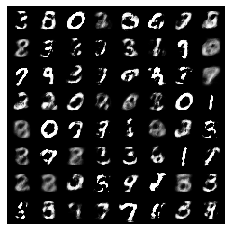

[Epoch 51/100] [D loss: -32.045418] [G loss: 31.554808]
0.015827719122171402
0.01391227263957262


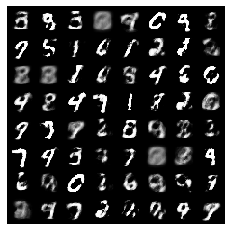

[Epoch 52/100] [D loss: -32.047325] [G loss: 31.990170]
0.002088265959173441
0.0003072262625209987


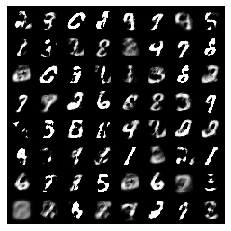

[Epoch 53/100] [D loss: -32.077560] [G loss: 31.709141]
0.011717505753040314
0.009089361876249313


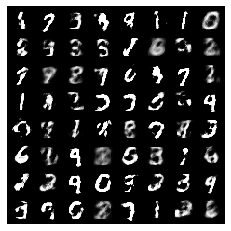

[Epoch 54/100] [D loss: -32.030933] [G loss: 31.779182]
0.008050885051488876
0.0069005656987428665


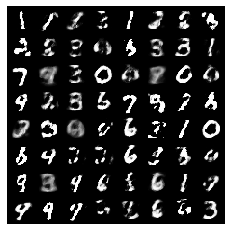

[Epoch 55/100] [D loss: -32.030159] [G loss: 31.581877]
0.014284204691648483
0.013066347688436508


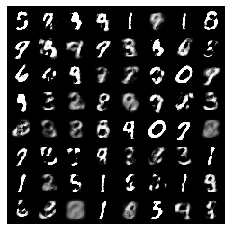

[Epoch 56/100] [D loss: -32.195663] [G loss: 32.018341]
0.006468065548688173
-0.000573124794755131


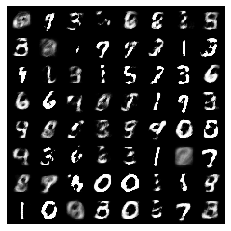

[Epoch 57/100] [D loss: -32.062958] [G loss: 31.484783]
0.018259402364492416
0.016100507229566574


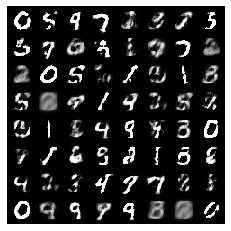

[Epoch 58/100] [D loss: -31.971817] [G loss: 31.871477]
0.0034755724482238293
0.004016358871012926


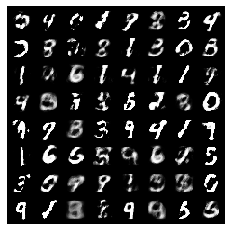

[Epoch 59/100] [D loss: -32.082130] [G loss: 31.890667]
0.006108693778514862
0.0034166364930570126


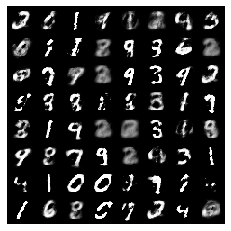

[Epoch 60/100] [D loss: -32.162323] [G loss: 31.902889]
0.008233783766627312
0.003034768160432577


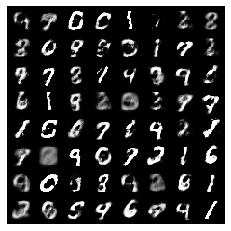

[Epoch 61/100] [D loss: -32.050385] [G loss: 31.753889]
0.00961397960782051
0.007690947037190199


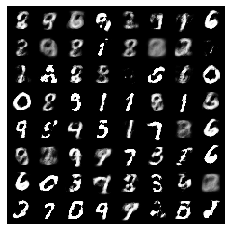

[Epoch 62/100] [D loss: -32.010529] [G loss: 31.828846]
0.006282586604356766
0.005348565988242626


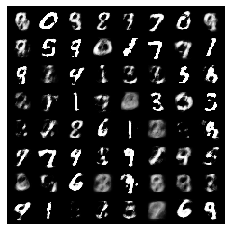

[Epoch 63/100] [D loss: -31.984659] [G loss: 31.688690]
0.009512880817055702
0.009728478267788887


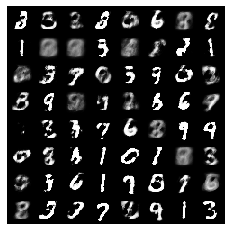

[Epoch 64/100] [D loss: -32.038681] [G loss: 31.846783]
0.00691608851775527
0.004788024351000786


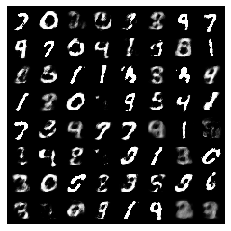

[Epoch 65/100] [D loss: -32.101818] [G loss: 31.987362]
0.0039537688717246056
0.00039497436955571175


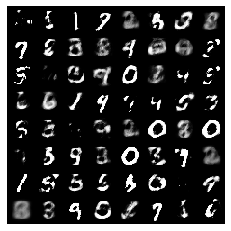

[Epoch 66/100] [D loss: -32.028542] [G loss: 31.735256]
0.009847378358244896
0.008273247629404068


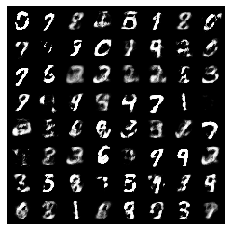

[Epoch 67/100] [D loss: -32.008789] [G loss: 31.757498]
0.00812106765806675
0.007578205317258835


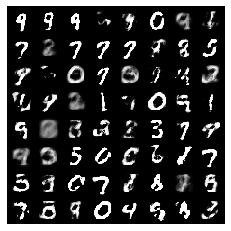

[Epoch 68/100] [D loss: -32.082481] [G loss: 31.793398]
0.009352469816803932
0.006456329021602869


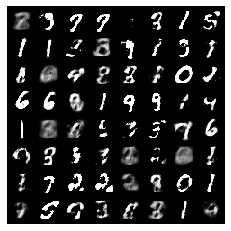

[Epoch 69/100] [D loss: -32.100544] [G loss: 32.050842]
0.0018815346993505955
-0.0015887883491814137


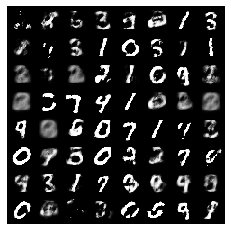

[Epoch 70/100] [D loss: -32.091412] [G loss: 31.712334]
0.0121842036023736
0.008989579975605011


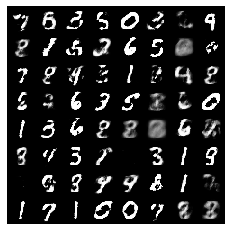

[Epoch 71/100] [D loss: -32.014721] [G loss: 31.616837]
0.012571939267218113
0.011973865330219269


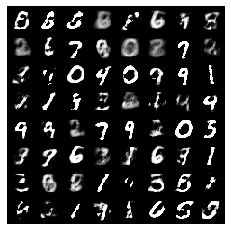

[Epoch 72/100] [D loss: -32.062202] [G loss: 31.681734]
0.012077977880835533
0.009945794939994812


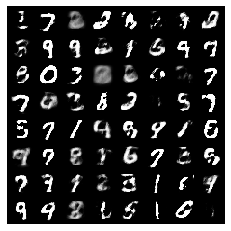

[Epoch 73/100] [D loss: -32.040894] [G loss: 31.876541]
0.005406524986028671
0.0038580717518925667


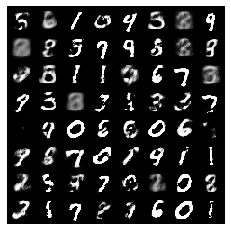

[Epoch 74/100] [D loss: -32.022892] [G loss: 31.871668]
0.0049660829827189445
0.00401038583368063


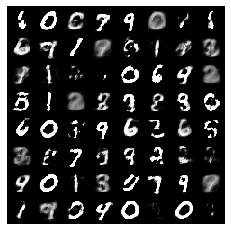

[Epoch 75/100] [D loss: -32.037518] [G loss: 31.718502]
0.010236615315079689
0.008796741254627705


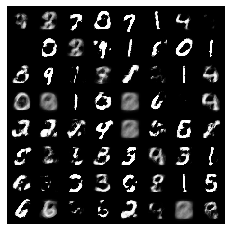

[Epoch 76/100] [D loss: -31.984253] [G loss: 31.308258]
0.02175270766019821
0.021616870537400246


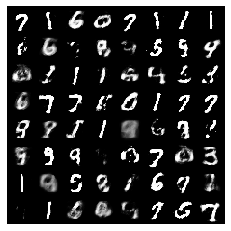

[Epoch 77/100] [D loss: -32.001740] [G loss: 31.536518]
0.014874807558953762
0.014483802020549774


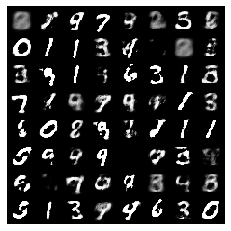

[Epoch 78/100] [D loss: -32.021828] [G loss: 31.728653]
0.009502127766609192
0.00847961287945509


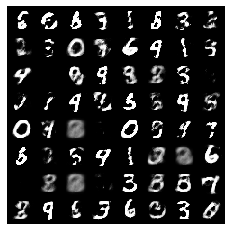

[Epoch 79/100] [D loss: -32.085369] [G loss: 31.741343]
0.011702250689268112
0.008083049207925797


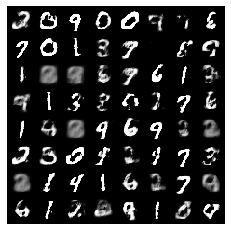

[Epoch 80/100] [D loss: -32.235836] [G loss: 31.585594]
0.020692281424999237
0.012950175441801548


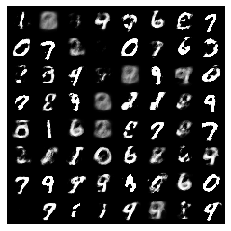

[Epoch 81/100] [D loss: -32.147701] [G loss: 31.841387]
0.010643735527992249
0.00495664868503809


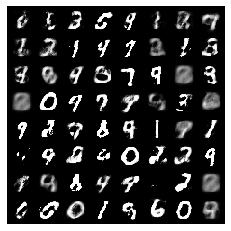

[Epoch 82/100] [D loss: -32.069782] [G loss: 31.758797]
0.010365957394242287
0.007537649013102055


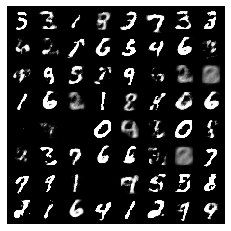

[Epoch 83/100] [D loss: -32.091141] [G loss: 31.610378]
0.015512068755924702
0.012175677344202995


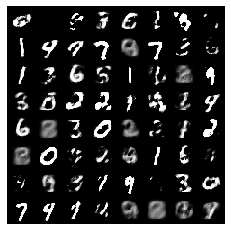

[Epoch 84/100] [D loss: -32.251427] [G loss: 31.872396]
0.012677840888500214
0.003987593576312065


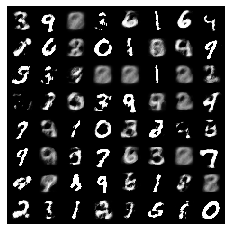

[Epoch 85/100] [D loss: -32.037437] [G loss: 31.868307]
0.005477599333971739
0.004115385934710503


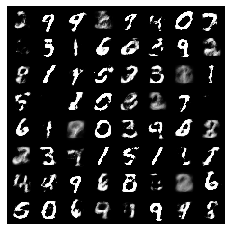

[Epoch 86/100] [D loss: -32.173714] [G loss: 31.850191]
0.010874779894948006
0.004681513179093599


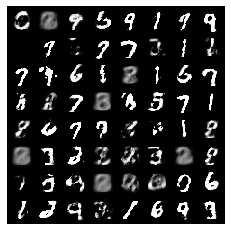

[Epoch 87/100] [D loss: -31.969250] [G loss: 31.755976]
0.006821139715611935
0.007625789847224951


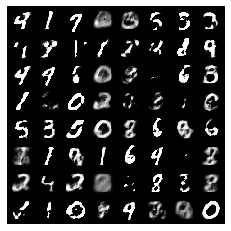

[Epoch 88/100] [D loss: -32.099800] [G loss: 31.656822]
0.014437663368880749
0.010724317282438278


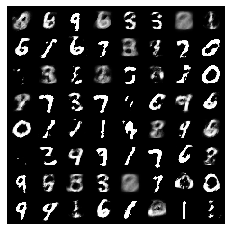

[Epoch 89/100] [D loss: -32.062473] [G loss: 31.480368]
0.018521320074796677
0.016238529235124588


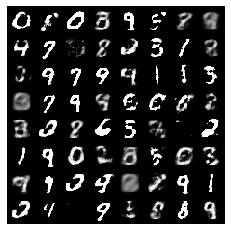

[Epoch 90/100] [D loss: -31.926199] [G loss: 32.011902]
-0.0023381051141768694
-0.0003719147644005716


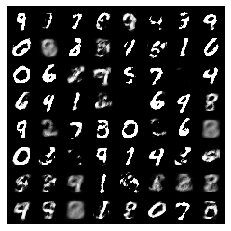

[Epoch 91/100] [D loss: -32.012802] [G loss: 31.788584]
0.007010116241872311
0.006606754846870899


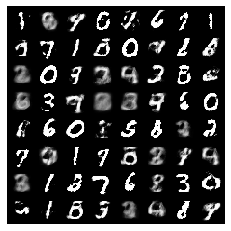

[Epoch 92/100] [D loss: -32.005302] [G loss: 31.715370]
0.009072115644812584
0.00889464933425188


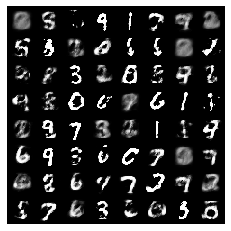

[Epoch 93/100] [D loss: -32.016071] [G loss: 31.793100]
0.0070248935371637344
0.006465617101639509


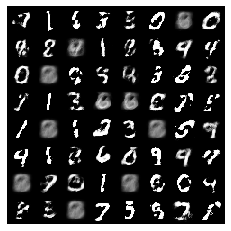

[Epoch 94/100] [D loss: -31.980518] [G loss: 31.853603]
0.004095505923032761
0.004574925173074007


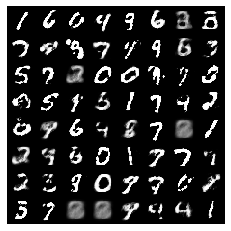

[Epoch 95/100] [D loss: -32.019287] [G loss: 31.953663]
0.0021638302132487297
0.0014479777310043573


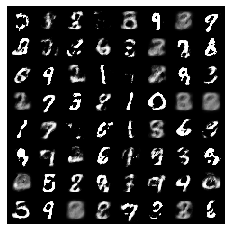

[Epoch 96/100] [D loss: -32.003395] [G loss: 31.783382]
0.006874734535813332
0.006769313011318445


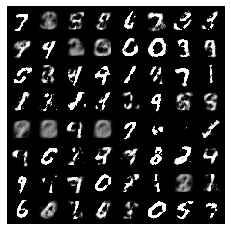

[Epoch 97/100] [D loss: -31.940563] [G loss: 31.880491]
0.002200990915298462
0.0037346361204981804


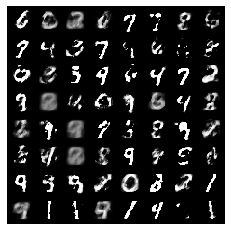

[Epoch 98/100] [D loss: -31.975578] [G loss: 31.934166]
0.00135697890073061
0.0020573120564222336


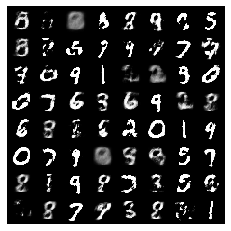

[Epoch 99/100] [D loss: -32.011368] [G loss: 31.870531]
0.004507011733949184
0.004045925103127956


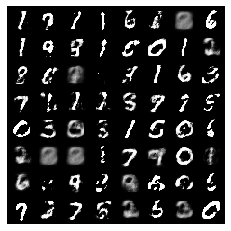

In [4]:
class Generator(nn.Module):
    def __init__(self, x_dim, h_dim, z_dim):
        super(Generator, self).__init__()
        
        self.z_dim = z_dim
        
        self.G = nn.Sequential(
            nn.Linear(z_dim, h_dim),
            nn.ReLU(),
            nn.Linear(h_dim, h_dim),
            nn.ReLU(),
            nn.Linear(h_dim, x_dim),
            nn.Sigmoid()
        )
        
    def forward(self, z):
        return self.G(z)
        
        
class Discriminator(nn.Module):
    def __init__(self, x_dim, h_dim, z_dim):
        super(Discriminator, self).__init__()
        
        self.D = nn.Sequential(
            nn.Linear(x_dim, h_dim),
            nn.ReLU(),
            nn.Linear(h_dim, h_dim),
            nn.ReLU(),
            nn.Linear(h_dim, 1),
#             nn.Sigmoid()
        )
        
    def forward(self, x):
        return self.D(x).squeeze()




device = torch.device('cuda:1' if torch.cuda.is_available() else 'cpu')
LR = 1e-3

G = Generator(x_dim=784, h_dim=128, z_dim=64).to(device)
D = Discriminator(x_dim=784, h_dim=128, z_dim=64).to(device)

optimizer_G = torch.optim.Adam(G.parameters(), lr=LR)
optimizer_D = torch.optim.Adam(D.parameters(), lr=LR)

epoch = 100
loss_log = []
D_log = []
for epo in range(epoch):
    for i, (imgs, _) in enumerate(train_loader):

        x = imgs.to(device)
        x = x.view(-1, 784)
        z = torch.randn(imgs.size(0), G.z_dim).to(device)

        
        # ---------------------
        #  Train Discriminator
        # ---------------------
        Gz = G(z)
        
        optimizer_D.zero_grad()
        d_loss = -torch.sum( 
            D(x) + 
            1 - D(Gz)
        ) 
        d_loss.backward()
        optimizer_D.step()
        
        for p in D.parameters(): p.data.clamp_(-0.01, 0.01)
        
        # -----------------
        #  Train Generator
        # -----------------
        Gz = G(z)
        
        optimizer_G.zero_grad()
        g_loss = torch.sum(1 - D(Gz))
        g_loss.backward()
        optimizer_G.step()
        
        
    
        
        
    print("[Epoch %d/%d] [D loss: %f] [G loss: %f]" % (epo, epoch, d_loss.item(), g_loss.item()))
    loss_log.append((d_loss.item(), g_loss.item()))
    
    print(D(x).mean().item())
    print(D(Gz).mean().item())
    D_log.append((D(x).mean().item(), D(Gz).mean().item()))
    
    z = torch.randn(64, G.z_dim).to(device)
    gen_imgs = G(z)
    gen_imgs = gen_imgs.view(-1, 1, 28, 28)
    generated_grid = torchvision.utils.make_grid(gen_imgs).cpu().detach().numpy().transpose(1, 2, 0)
    plt.imshow(generated_grid)
    plt.axis('off')
    plt.imsave('result/wgan/gen_epo{}.png'.format(epo), generated_grid)
    plt.show()


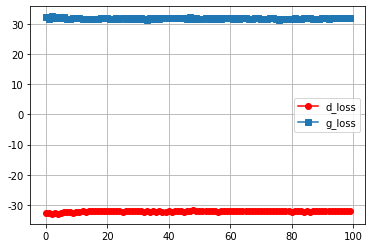

In [5]:
d_loss_log = [l[0] for l in loss_log]
g_loss_log = [l[1] for l in loss_log]

plt.grid()
plt.plot(range(len(d_loss_log)), d_loss_log, 'ro-')
plt.plot(range(len(g_loss_log)), g_loss_log, 's-')

plt.legend(('d_loss', 'g_loss'))

plt.savefig('result/wgan/train_log.png')

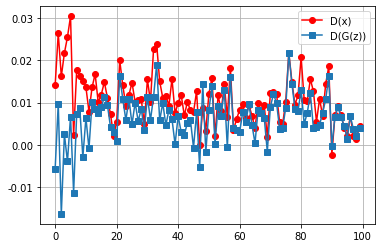

In [6]:
Dx_log = [l[0] for l in D_log]
DGz_log = [l[1] for l in D_log]

plt.grid()
plt.plot(range(len(Dx_log)), Dx_log, 'ro-')
plt.plot(range(len(DGz_log)), DGz_log, 's-')

plt.legend(('D(x)', 'D(G(z))'))

plt.savefig('result/wgan/D_log.png')

In [7]:
torch.save(G.state_dict(), "saved_models/WGAN_G.pth")
torch.save(D.state_dict(), "saved_models/WGAN_D.pth")